In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import geopandas as gpd
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt 
import shapely as shp
import os, sys
from tqdm import tqdm
sys.path.append('../scripts/')
import loadpaths
import land_cover_analysis as lca
import land_cover_visualisation as lcv
path_dict = loadpaths.loadpaths()


/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


adding scrub
splitting up heath
adding wetland
adding transport


In [8]:
df_tmp

PLAN_NO  MAPNUM  SQNUM  B1_70  B2_70  B3_70  B6_70  B1_80  B2_80  B3_80  \
0    SE0002       6     11      0      0      0      0      0      0      0   
1    SE0100       6      2      0      0      0      0      0      0      0   
2    SE0101       6      7      0      0      0      0      0      0      0   
3    SE0102       6     12      0      0      1      0      0      0      1   
4    SE0200       6      3      0      0      0      0      0      0      0   
..      ...     ...    ...    ...    ...    ...    ...    ...    ...    ...   
229  SK2794      22     23      0      0      0      0      0      0      0   
230  SK2794      22     23      0      0      0      0      0      0      0   
231  SK2882      36     14      0      0      0      0      0      0      0   
232  SK2883      36     19      0      0      0      0      0      0      0   
233  SK3167      63     12      0      0      0      0      0      0      0   

     ...  TYSQ10   EASTM  NORTHM  ONE  MI_PRINX  index_righ  lc_label  id_pol  \
0    ...      32  400500  402500    1         3        9501       H2a    9502   
1    ...      32  401500  400500    1        16        9501       H2a    9502   
2    ...      32  401500  401500    1        17        9501       H2a    9502   
3    ...      32  401500  402500    1        18        9501       H2a    9502   
4    ...      32  402500  400500    1        31        9501       H2a    9502   
..   ...     ...     ...     ...  ...       ...         ...       ...     ...   
229  ...      29  427500  394500    1      1955        9754       H2a    9755   
230  ...      29  427500  394500    1      1955        9755       H2a    9756   
231  ...      24  428500  382500    1      1988        9750       H2a    9751   
232  ...      24  428500  383500    1      1989        9750       H2a    9751   
233  ...      15  431500  367500    1      2068        9745       H2a    9746   

     keep_h2a                                           geometry  
0           0  POLYGON ((400000.000 401999.998, 400000.000 40...  
1           0  POLYGON ((401000.002 400000.000, 401000.002 40...  
2           0  POLYGON ((401000.002 401000.004, 401000.002 40...  
3           0  POLYGON ((401000.002 401999.998, 401000.002 40...  
4           0  POLYGON ((401999.996 400000.000, 401999.996 40...  
..        ...                                                ...  
229         0  POLYGON ((427000.003 393999.998, 427000.003 39...  
230         0  POLYGON ((427000.003 393999.998, 427000.003 39...  
231         0  POLYGON ((427999.997 382000.003, 427999.997 38...  
232         0  POLYGON ((427999.997 382999.997, 427999.997 38...  
233         0  POLYGON ((431000.003 366999.997, 431000.003 36...  

[234 rows x 44 columns]

In [17]:
df_tmp = lca.load_pols('/home/tplas/repos/cnn-land-cover/content/tiles_qr/tiles_qr.shp')
# df_tmp[df_tmp['PLAN_NO'] == 'SK2292']
print(len(df_tmp), len(df_tmp['PLAN_NO'].unique()))
df_tmp = df_tmp.drop(columns=['lc_label', 'id_pol', 'keep_h2a'])
df_improved = df_tmp.drop_duplicates(subset=['PLAN_NO'])
len(df_tmp), len(df_improved)

234 152


(234, 152)

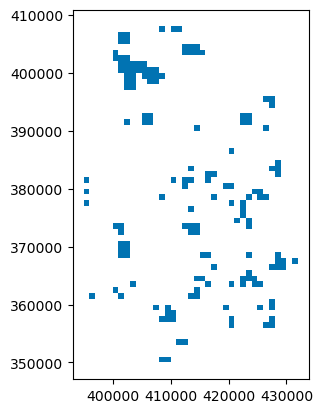

In [18]:
df_tmp['geometry'].plot()

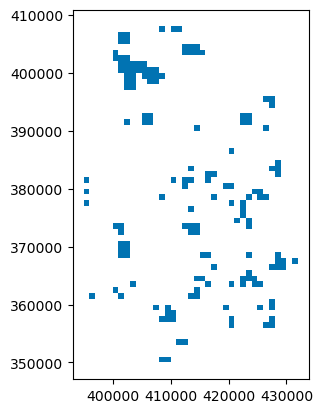

In [20]:
df_improved['geometry'].plot()

In [21]:
df_improved.to_file('/home/tplas/repos/cnn-land-cover/content/tiles_qr/tiles_qr.shp')

# Create FGH layer without false quarries

In [4]:
tmp_path = '/home/tplas/data/gis/tmp_fgh_layer_quarries_removed/tmp_fgh_layer_qr.shp' 
df_fgh_qr = gpd.read_file(tmp_path)
df_qr = df_fgh_qr[np.logical_and(df_fgh_qr['keep_h2a'] == 0, 
                                  df_fgh_qr['lc_label'] == 'H2a')]
df_qr

lc_label  id_pol  keep_h2a  \
9460      H2a    9461         0   
9461      H2a    9462         0   
9462      H2a    9463         0   
9464      H2a    9465         0   
9465      H2a    9466         0   
...       ...     ...       ...   
9751      H2a    9752         0   
9753      H2a    9754         0   
9754      H2a    9755         0   
9755      H2a    9756         0   
9756      H2a    9757         0   

                                               geometry  
9460  POLYGON ((409050.480 350157.190, 409051.326 35...  
9461  POLYGON ((409401.690 357513.700, 409400.410 35...  
9462  POLYGON ((409042.640 358023.990, 409049.300 35...  
9464  POLYGON ((409395.390 358789.390, 409392.740 35...  
9465  POLYGON ((409399.980 359218.250, 409388.110 35...  
...                                                 ...  
9751  POLYGON ((427434.500 383735.000, 427422.000 38...  
9753  POLYGON ((426757.420 390884.470, 426757.420 39...  
9754  POLYGON ((427919.200 394492.160, 427919.250 39...  
9755  POLYGON ((427480.610 394871.920, 427481.670 39...  
9756  POLYGON ((426575.500 395384.350, 426577.020 39...  

[157 rows x 4 columns]

In [5]:
df_fgh_new = df_fgh_qr[np.logical_or(df_fgh_qr['keep_h2a'] == 1,
                                        df_fgh_qr['lc_label'] != 'H2a')]

In [8]:
df_dfgh_original = lca.load_pols('/home/tplas/data/gis/tmp_fgh_layer/tmp_fgh_layer.shp')
df_dfgh_original.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: UK - Britain and UKCS 49°46'N to 61°01'N, 7°33'W to 3°33'E
- bounds: (-9.2, 49.75, 2.88, 61.14)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [9]:
df_fgh_new = df_fgh_new.drop(columns=['keep_h2a', 'id_pol'])
df_fgh_new.crs = df_dfgh_original.crs
df_fgh_new

lc_label                                           geometry
0           F2  POLYGON ((400841.890 360432.090, 400841.600 36...
1           F2  POLYGON ((399308.710 360858.520, 399311.100 36...
2           F2  POLYGON ((398209.238 361574.805, 398211.921 36...
3           F2  POLYGON ((399679.571 362509.906, 399682.710 36...
4           F2  POLYGON ((397708.580 363577.710, 397708.910 36...
...        ...                                                ...
18051      H3b  POLYGON ((427553.290 395338.570, 427552.560 39...
18052      H3b  POLYGON ((427769.030 395617.170, 427771.450 39...
18053      H3b  POLYGON ((427765.920 395621.030, 427765.720 39...
18054      H3b  POLYGON ((427845.770 395627.500, 427844.170 39...
18055      H3b  POLYGON ((427793.969 395643.348, 427798.820 39...

[17899 rows x 2 columns]

In [10]:
assert len(df_fgh_new) + len(df_qr) == len(df_fgh_qr)
assert df_fgh_new.crs != None
print(len(df_fgh_new[df_fgh_new['lc_label'] == 'H2a']))
os.makedirs('/home/tplas/data/gis/fgh_layer_v2/', exist_ok=True)
df_fgh_new.to_file('/home/tplas/data/gis/fgh_layer_v2/fgh_layer_v2.shp')

140


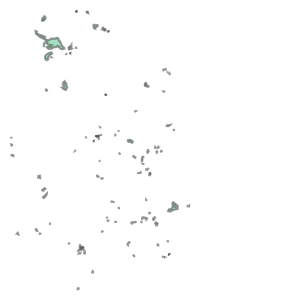

In [14]:
df_qr.unary_union

In [15]:
df_tile_outlines = lca.load_pols(path_dict['landscape_character_grid_path'])

## find intersecting tiles with df_qr 
df_tiles_qr = gpd.sjoin(df_tile_outlines, df_qr, how='inner', op='intersects')

for ii in range(len(df_tiles_qr)):
    assert df_tiles_qr.iloc[ii]['geometry'].intersects(df_qr.unary_union)

list_tile_names_qr = df_tiles_qr['PLAN_NO'].unique()

/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: PROJCS["OSGB_1936_British_National_Grid",GEOGCS["G ...
Right CRS: None

  after removing the cwd from sys.path.


In [16]:
os.makedirs('/home/tplas/repos/cnn-land-cover/content/tiles_qr/', exist_ok=True)
df_tiles_qr.to_file('/home/tplas/repos/cnn-land-cover/content/tiles_qr/tiles_qr.shp')

/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  


## Merge main predictions in sections:

In [3]:
tile_outlines_tight = lca.load_pols('../content/landscape_character_grid/Landscape_Character_Grid_tight.shp')
assert len(tile_outlines_tight) == 1617 
col_sections = '100_grid'
assert col_sections in tile_outlines_tight.columns
arr_sections = tile_outlines_tight[col_sections].unique()
# tile_outlines_tight.head(5)

path_individual_tiles = '/media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/'
assert len(os.listdir(path_individual_tiles)) == 1617
dir_save_merger = '/media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/merged_tiles_100kmsections/'


In [4]:
for section in tqdm(arr_sections):
    tiles_in_section = list(tile_outlines_tight[tile_outlines_tight[col_sections] == section]['PLAN_NO'])

    curr_dir_name = path_individual_tiles.split('/') 
    curr_dir_name = curr_dir_name[-2] if curr_dir_name[-1] != '' else curr_dir_name[-3]  # in case dir_indiv_tile_shp ends with '/'
    filename_merger = f'merged_{curr_dir_name}_section-{section}.shp'

    lca.merge_individual_shp_files(dir_indiv_tile_shp=path_individual_tiles, 
                                    delete_individual_shp_files=False,
                                    list_tile_ids_to_merge=tiles_in_section,
                                    filename=filename_merger,
                                    dir_save_merger=dir_save_merger)

  0%|          | 0/26 [00:00<?, ?it/s]

Found 95/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/ with tile ids
Merging 95 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/



0it [00:00, ?it/s]

95it [00:08, 11.78it/s]
  4%|▍         | 1/26 [00:30<12:37, 30.32s/it]

Found 12/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/ with tile ids
Merging 12 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/


12it [00:01,  6.50it/s]
  8%|▊         | 2/26 [00:39<07:15, 18.16s/it]

Found 51/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/ with tile ids
Merging 51 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/


51it [00:05,  9.59it/s]
 12%|█▏        | 3/26 [01:00<07:27, 19.46s/it]

Found 3/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/ with tile ids
Merging 3 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/


3it [00:00,  5.18it/s]
 15%|█▌        | 4/26 [01:03<04:40, 12.74s/it]

Found 58/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/ with tile ids
Merging 58 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/


58it [00:08,  7.22it/s]
 19%|█▉        | 5/26 [01:37<07:09, 20.44s/it]

Found 56/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/ with tile ids
Merging 56 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/


56it [00:07,  7.83it/s]
 23%|██▎       | 6/26 [02:07<07:53, 23.70s/it]

Found 19/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/ with tile ids
Merging 19 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/


19it [00:03,  5.74it/s]
 27%|██▋       | 7/26 [02:23<06:40, 21.10s/it]

Found 67/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/ with tile ids
Merging 67 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/


67it [00:08,  7.70it/s]
 31%|███       | 8/26 [02:59<07:44, 25.80s/it]

Found 100/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/ with tile ids
Merging 100 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/


100it [00:14,  7.14it/s]
 35%|███▍      | 9/26 [03:57<10:10, 35.93s/it]

Found 69/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/ with tile ids
Merging 69 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/


69it [00:10,  6.44it/s]
 38%|███▊      | 10/26 [04:42<10:20, 38.76s/it]

Found 76/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/ with tile ids
Merging 76 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/


76it [00:11,  6.89it/s]
 42%|████▏     | 11/26 [05:31<10:27, 41.81s/it]

Found 85/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/ with tile ids
Merging 85 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/


85it [00:11,  7.54it/s]
 46%|████▌     | 12/26 [06:22<10:25, 44.65s/it]

Found 1/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/ with tile ids
Merging 1 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/


1it [00:00,  5.21it/s]
 50%|█████     | 13/26 [06:23<06:48, 31.45s/it]

Found 17/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/ with tile ids
Merging 17 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/


17it [00:02,  7.50it/s]
 54%|█████▍    | 14/26 [06:33<04:58, 24.88s/it]

Found 100/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/ with tile ids
Merging 100 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/


100it [00:10,  9.34it/s]
 58%|█████▊    | 15/26 [07:14<05:28, 29.84s/it]

Found 100/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/ with tile ids
Merging 100 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/


100it [00:07, 13.40it/s]
 62%|██████▏   | 16/26 [07:39<04:44, 28.50s/it]

Found 100/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/ with tile ids
Merging 100 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/


100it [00:07, 12.75it/s]
 65%|██████▌   | 17/26 [08:07<04:14, 28.27s/it]

Found 100/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/ with tile ids
Merging 100 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/


100it [00:12,  7.97it/s]
 69%|██████▉   | 18/26 [08:56<04:36, 34.60s/it]

Found 100/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/ with tile ids
Merging 100 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/


100it [00:06, 15.81it/s]
 73%|███████▎  | 19/26 [09:17<03:32, 30.30s/it]

Found 40/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/ with tile ids
Merging 40 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/


40it [00:05,  7.71it/s]
 77%|███████▋  | 20/26 [09:38<02:46, 27.68s/it]

Found 82/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/ with tile ids
Merging 82 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/


82it [00:10,  7.79it/s]
 81%|████████  | 21/26 [10:19<02:38, 31.67s/it]

Found 100/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/ with tile ids
Merging 100 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/


100it [00:13,  7.19it/s]
 85%|████████▍ | 22/26 [11:16<02:36, 39.23s/it]

Found 92/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/ with tile ids
Merging 92 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/


92it [00:13,  6.94it/s]
 88%|████████▊ | 23/26 [12:10<02:10, 43.66s/it]

Found 76/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/ with tile ids
Merging 76 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/


76it [00:11,  6.67it/s]
 92%|█████████▏| 24/26 [12:58<01:29, 44.87s/it]

Found 8/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/ with tile ids
Merging 8 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/


8it [00:01,  7.36it/s]
 96%|█████████▌| 25/26 [13:04<00:33, 33.32s/it]

Found 10/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/ with tile ids
Merging 10 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/


10it [00:01,  9.16it/s]
100%|██████████| 26/26 [13:10<00:00, 30.41s/it]


## Merge detailed predictions in sections:
Difference with main is that:
- we need to merge 3 different shp files (C, D and E)
- we need to exclude no-class predictions from each
- we need to include FGH layer from main predictions 
- create new individual tiles on the fly? 

In [3]:
tile_outlines_tight = lca.load_pols('../content/landscape_character_grid/Landscape_Character_Grid_tight.shp')
# n_expected_tiles = 1617
# tile_outlines_tight = tile_outlines_tight[tile_outlines_tight['PLAN_NO'].isin(['SJ9661', 'SJ9762'])]
n_expected_tiles = 1617

assert len(tile_outlines_tight) == n_expected_tiles, f'len(tile_outlines_tight) = {len(tile_outlines_tight)}'
col_sections = '100_grid'
assert col_sections in tile_outlines_tight.columns
arr_sections = tile_outlines_tight[col_sections].unique()
# tile_outlines_tight.head(5)3

path_individual_tiles_main = '/media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1259_notdissolved_padding44_FGH-override/individual_tiles/'
path_individual_tiles_c = '/media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-21-1335_notdissolved_clippedC_padding44/individual_tiles/'
path_individual_tiles_d = '/media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-25-2057_notdissolved_clippedD_padding44/individual_tiles/'
path_individual_tiles_e = '/media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_2023-04-24-1216_notdissolved_clippedE_padding44/individual_tiles/'

def create_list_all_subdirs(parent_dir):
    return [os.path.join(parent_dir, x) for x in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, x))]

list_tiles_dict = {}
list_tiles_dict['main'] = create_list_all_subdirs(path_individual_tiles_main)
list_tiles_dict['c'] = create_list_all_subdirs(path_individual_tiles_c)
list_tiles_dict['d'] = create_list_all_subdirs(path_individual_tiles_d)
list_tiles_dict['e'] = create_list_all_subdirs(path_individual_tiles_e)

for k, v in list_tiles_dict.items():
    assert len(v) == n_expected_tiles, f'len(v) = {len(v)} for k = {k}'

In [4]:
df_schema = lca.create_df_mapping_labels_2022_to_80s()
dict_mapping_code_to_name = dict(zip(df_schema['code_2022'], df_schema['description_2022']))
dict_mapping_code_to_name['G2'] = dict_mapping_code_to_name['G2a']
# dict_mapping_code_to_name

adding scrub
splitting up heath
adding wetland
adding transport


In [5]:
# pols_merged.plot(column='lc_label')
# print(tile, len(tile), total_area)
pols_merged

NameError: name 'pols_merged' is not defined

In [45]:
## Step 1: merge different predictions for the same tile into one file:
path_folder_complete_tiles = '/media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/' 
list_tiles = list(tile_outlines_tight['PLAN_NO'])
assert len(list_tiles) == n_expected_tiles
col_label = 'lc_label'
total_area_dict = {}

for tile in list_tiles:
    pols_dict = {}
    for name_classifier, list_tiles_pred in list_tiles_dict.items():
        curr_tile = [x for x in list_tiles_pred if tile in x]
        assert len(curr_tile) == 1, f'len(curr_tile) = {len(curr_tile)}'
        curr_tile = curr_tile[0]
        current_pols = lca.load_pols(curr_tile)
        current_pols = current_pols.drop(columns=['class'])
        if name_classifier == 'main':  # only keep FGH layer 
            pols_dict[name_classifier] = current_pols[np.isin(current_pols[col_label].apply(lambda x: x[0]), ['F', 'G', 'H'])]
            pols_dict[name_classifier]['Class name'] = pols_dict[name_classifier][col_label].apply(lambda x: dict_mapping_code_to_name[x])
        else:  # remove no class
            pols_dict[name_classifier] = current_pols[current_pols[col_label] != '0']
    pols_merged = gpd.GeoDataFrame(pd.concat([pols_dict['main'], pols_dict['c'], pols_dict['d'], pols_dict['e']], 
                                             ignore_index=True), 
                                   crs=pols_dict['main'].crs)
    total_area = pols_merged.area.sum()
    assert total_area > 0, f'total_area = {total_area}'
    # assert np.isclose(total_area, 1e6, atol=1e1), f'total_area = {total_area}'
    total_area_dict[tile] = total_area

    name_file = f'LCU_detailed-combined_{tile}_LC-prediction'
    if not os.path.exists(os.path.join(path_folder_complete_tiles, name_file)):
        os.makedirs(os.path.join(path_folder_complete_tiles, name_file))
    pols_merged.to_file(os.path.join(path_folder_complete_tiles, name_file, f'{name_file}.shp'))

/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

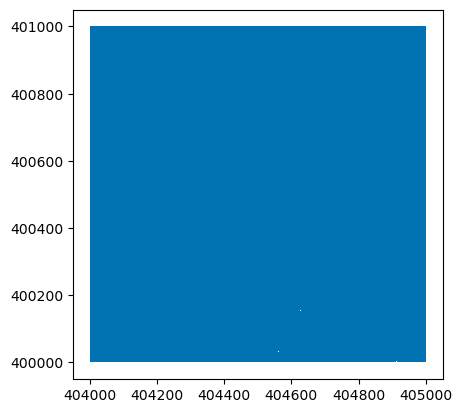

In [44]:
# pols_dict['d'].plot()
# tile
tmp = lca.load_pols([x for x in list_tiles_dict['e'] if 'SE0400' in x][0])
# tmp[tmp['lc_label'] != 'H2a'].plot()
tmp[tmp['lc_label'] == '0'].plot()

In [17]:
inds_sorted = np.argsort(pols_merged['geometry'].area)
pols_merged['area'] = pols_merged['geometry'].area
pols_merged = pols_merged.iloc[inds_sorted]
pols_merged

/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


lc_label                       source  \
2950       D3             model prediction   
81        F3a             model prediction   
68        F3a             model prediction   
2204      F3a             model prediction   
2580      D1a             model prediction   
...       ...                          ...   
766       D1a             model prediction   
1586      D1a             model prediction   
3414      D6c             model prediction   
3428      F3a             model prediction   
0         H2a  OS NGD retrieved 2023-06-07   

                                               geometry  \
2950  POLYGON ((404183.625 400127.000, 404183.750 40...   
81    POLYGON ((404337.750 400965.875, 404337.875 40...   
68    POLYGON ((404351.375 400970.250, 404351.500 40...   
2204  POLYGON ((404220.000 400315.875, 404220.125 40...   
2580  POLYGON ((404019.250 400243.125, 404019.375 40...   
...                                                 ...   
766   POLYGON ((404940.875 400993.000, 404943.500 40...   
1586  POLYGON ((404985.000 400794.250, 404985.375 40...   
3414  POLYGON ((404314.125 400754.125, 404314.250 40...   
3428  POLYGON ((404000.000 401000.000, 404110.500 40...   
0     POLYGON ((404616.500 400147.500, 404609.000 40...   

                            Class name           area  
2950                           Bracken       0.015625  
81                   Wetland, Peat Bog       0.015625  
68                   Wetland, Peat Bog       0.015625  
2204                 Wetland, Peat Bog       0.015625  
2580                      Upland Heath       0.015625  
...                                ...            ...  
766                       Upland Heath   33325.531250  
1586                      Upland Heath   45893.593750  
3414  Upland Heath/Blanket Peat Mosaic  190147.031250  
3428                 Wetland, Peat Bog  555437.953125  
0        Quarries and Mineral Workings  868108.603142  

[3438 rows x 5 columns]

In [46]:
## Step 2: merge all tiles into one file per section:
path_folder_complete_tiles = '/media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/'
path_folder_sections = '/media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/merged_tiles_100kmsections/'

for section in tqdm(arr_sections):
    tiles_in_section = list(tile_outlines_tight[tile_outlines_tight[col_sections] == section]['PLAN_NO'])

    curr_dir_name = path_folder_complete_tiles.split('/') 
    curr_dir_name = curr_dir_name[-2] if curr_dir_name[-1] != '' else curr_dir_name[-3]  # in case dir_indiv_tile_shp ends with '/'
    # assert False, curr_dir_name
    filename_merger = f'merged_{curr_dir_name}_section-{section}.shp'

    lca.merge_individual_shp_files(dir_indiv_tile_shp=path_folder_complete_tiles, 
                                    delete_individual_shp_files=False,
                                    list_tile_ids_to_merge=tiles_in_section,
                                    filename=filename_merger,
                                    dir_save_merger=path_folder_sections)
    

  0%|          | 0/26 [00:00<?, ?it/s]

Found 95/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/ with tile ids
Merging 95 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/


95it [01:15,  1.26it/s]
  4%|▍         | 1/26 [03:58<1:39:11, 238.04s/it]

Found 12/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/ with tile ids
Merging 12 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/


12it [00:15,  1.30s/it]
  8%|▊         | 2/26 [04:44<50:08, 125.34s/it]  

Found 51/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/ with tile ids
Merging 51 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/


51it [00:39,  1.28it/s]
 12%|█▏        | 3/26 [06:41<46:31, 121.39s/it]

Found 3/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/ with tile ids
Merging 3 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/


3it [00:03,  1.10s/it]
 15%|█▌        | 4/26 [06:49<28:09, 76.79s/it] 

Found 58/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/ with tile ids
Merging 58 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/


58it [00:47,  1.23it/s]
 19%|█▉        | 5/26 [09:03<34:07, 97.48s/it]

Found 56/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/ with tile ids
Merging 56 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/


56it [00:47,  1.19it/s]
 23%|██▎       | 6/26 [11:18<36:44, 110.24s/it]

Found 19/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/ with tile ids
Merging 19 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/


19it [00:19,  1.02s/it]
 27%|██▋       | 7/26 [12:27<30:38, 96.74s/it] 

Found 67/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/ with tile ids
Merging 67 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/


67it [00:50,  1.33it/s]
 31%|███       | 8/26 [14:49<33:20, 111.12s/it]

Found 100/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/ with tile ids
Merging 100 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/


100it [01:30,  1.11it/s]
 35%|███▍      | 9/26 [19:13<44:59, 158.77s/it]

Found 69/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/ with tile ids
Merging 69 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/


69it [01:13,  1.06s/it]
 38%|███▊      | 10/26 [23:12<48:59, 183.72s/it]

Found 76/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/ with tile ids
Merging 76 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/


76it [01:12,  1.05it/s]
 42%|████▏     | 11/26 [26:55<48:56, 195.78s/it]

Found 85/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/ with tile ids
Merging 85 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/


85it [01:16,  1.12it/s]
 46%|████▌     | 12/26 [30:46<48:11, 206.51s/it]

Found 1/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/ with tile ids
Merging 1 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/


1it [00:00,  1.24it/s]
 50%|█████     | 13/26 [30:49<31:23, 144.85s/it]

Found 17/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/ with tile ids
Merging 17 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/


17it [00:13,  1.26it/s]
 54%|█████▍    | 14/26 [31:24<22:18, 111.51s/it]

Found 100/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/ with tile ids
Merging 100 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/


100it [01:02,  1.60it/s]
 58%|█████▊    | 15/26 [34:08<23:20, 127.35s/it]

Found 100/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/ with tile ids
Merging 100 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/


100it [00:46,  2.16it/s]
 62%|██████▏   | 16/26 [35:53<20:06, 120.68s/it]

Found 100/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/ with tile ids
Merging 100 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/


100it [00:52,  1.92it/s]
 65%|██████▌   | 17/26 [38:06<18:37, 124.21s/it]

Found 100/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/ with tile ids
Merging 100 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/


100it [01:24,  1.19it/s]
 69%|██████▉   | 18/26 [42:14<21:32, 161.51s/it]

Found 100/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/ with tile ids
Merging 100 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/


100it [01:17,  1.29it/s]
 73%|███████▎  | 19/26 [45:55<20:55, 179.38s/it]

Found 40/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/ with tile ids
Merging 40 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/


40it [00:33,  1.21it/s]
 77%|███████▋  | 20/26 [47:27<15:18, 153.03s/it]

Found 82/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/ with tile ids
Merging 82 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/


82it [01:00,  1.35it/s]
 81%|████████  | 21/26 [50:22<13:18, 159.76s/it]

Found 100/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/ with tile ids
Merging 100 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/


100it [01:33,  1.07it/s]
 85%|████████▍ | 22/26 [54:45<12:43, 190.84s/it]

Found 92/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/ with tile ids
Merging 92 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/


92it [01:25,  1.08it/s]
 88%|████████▊ | 23/26 [58:59<10:28, 209.63s/it]

Found 76/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/ with tile ids
Merging 76 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/


76it [01:13,  1.03it/s]
 92%|█████████▏| 24/26 [1:02:40<07:05, 212.99s/it]

Found 8/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/ with tile ids
Merging 8 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/


8it [00:09,  1.13s/it]
 96%|█████████▌| 25/26 [1:03:08<02:37, 157.51s/it]

Found 10/1617 tiles in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/ with tile ids
Merging 10 tiles found in /media/data-hdd/gis_pd/predictions/all_tiles_pd_notdissolved/predictions_LCU_detailed-combined/individual_tiles/


10it [00:06,  1.55it/s]
100%|██████████| 26/26 [1:03:29<00:00, 146.53s/it]


In [2]:
# total_area_dict

## Create 100km^2 grids for different mergers:

In [23]:
outline_pd = lca.load_pols(path_dict['pd_outline'])
outline_pd = outline_pd.iloc[0]['geometry']
all_tiles = lca.load_pols(path_dict['landscape_character_grid_path'])
all_tiles = all_tiles[all_tiles['geometry'].intersects(outline_pd)]
all_tiles = all_tiles.reset_index(drop=True)
assert len(all_tiles) == 1617

In [24]:
# all_tiles['COUNTY'].unique()
## tiles per county:
n_tiles_per_county = all_tiles.groupby('COUNTY').size()
n_tiles_per_county

COUNTY
CHESHIR    108
DERBYSH    993
GT MAN      32
SOUTHYO    194
STAFFOR    229
WESTYOR     61
dtype: int64

In [25]:
all_tiles['100_grid'] = all_tiles['PLAN_NO'].apply(lambda x: x[:3] + x[4])

In [26]:
all_tiles['100_grid'].unique()

array(['SE00', 'SE01', 'SE10', 'SE20', 'SJ96', 'SJ97', 'SJ98', 'SK05',
       'SK06', 'SK07', 'SK08', 'SK09', 'SK04', 'SK14', 'SK15', 'SK16',
       'SK17', 'SK18', 'SK19', 'SK25', 'SK26', 'SK27', 'SK28', 'SK29',
       'SK36', 'SK37'], dtype=object)

In [27]:
all_tiles.to_file('/home/thijs/repos/cnn-land-cover/content/landscape_character_grid/Landscape_Character_Grid_tight.shp')